# Examen A Módulo 1 - Optimización.

**Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_MoralesGabriel*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`,`B`) o (`Esc`,`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

Carlos Riolo Sotelo
09/03/2023

---
# Primer punto. Optimización de funciones con `SymPy` (34 puntos)

**Costo mínimo**. Imagine un contenedor rectangular sin tapa que debe satisfacer las siguientes condiciones:

- Este contenedor debe tener un volumen **V**.
- La longitud de su base es el doble que el de su ancho.
- El material para la base cuesta 10.00 MXN por cada $m^2$.
- El material para los lados cuesta 6.00 MXN por cada $m^2$.

¿Cuál es el costo del contenedor más barato?


1. Escriba el costo **C** del contenedor como una función del ancho de la base $x$ y de su altura $h$. Realice este punto usando $\LaTeX$ y celdas *Markdown*.

Costo del Contenedor:
- Base: $10*2x^2=20 x^2$
- Lado: $2xh+4xh=36xh$
$$C=20x^2 + 36hx$$

2. Determina las dimensiones del contenedor si el volumen debe ser de $12m^3$.

### Minimizar

### Función de Volumen
- $V=2 x^2 h=12 m^3$


In [1]:
import numpy as np
import sympy as sp

sp.var("x,h")
vol=2*(x**2)*h-12
vol
alt=sp.solve(vol,h)[0]
costo=20*x**2+6*x*h
alt

6/x**2

In [2]:
sust=costo.subs(h,alt)
sust

20*x**2 + 36/x

In [3]:
sp.diff(sust,x)

40*x - 36/x**2

In [4]:
resp1=sp.solve(sp.diff(sust,x),x)[0]
float(resp1)

0.9654893846056297

In [5]:
seg_der=sp.diff(sust,x,2)
seg_der

8*(5 + 9/x**3)

In [6]:
h_fin=alt.subs(x,resp1)
float(h_fin)

6.436595897370865

## Resultados
- Longuitud del lado: $x=0.9655m$

- Altura: $h=6.4366 m$

3. ¿Cuál fue el costo de fabricar este contenedor?

In [7]:
base=20*float(resp1)**2
base

18.643395035723152

In [14]:
lados=36*float(resp1)*float(h_fin)
lados

223.72074042867783

In [9]:
Costo_total=base+lados
Costo_total

242.364135464401

## Resultados

- El costo total del contenedor es de: $242.36$ MXN

---
# Segundo punto. Programación lineal (33 puntos)

Una empresa se dedica a fabricar tarjetas de control para automóviles, y están en su momento de planeación de compras anuales. Hay 5 proveedores que pueden proveer los componentes, cada uno a su propio precio.

<table>
  <tr>
      <th>  </th>
      <th>Proveedor 1</th>
      <th>Proveedor 2</th>
      <th>Proveedor 3</th>
      <th>Demanda</th>
  </tr>
  <tr>
      <th>Componente 1</th>
      <td>0.5</td>
      <td>0.6</td>
      <td>0.7</td>
      <td>15000</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Componente 2</th>
      <td>0.7</td>
      <td>0.5</td>
      <td>0.6</td>
      <td>20000</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Componente 3</th>
      <td>0.32</td>
      <td>0.54</td>
      <td>0.8</td>
      <td>12000</td>
  </tr>

  <tr style="border-bottom: 1px solid #000;">
      <th>Capacidad</th>
      <td> 21000 </td>
      <td> 16000 </td>
      <td> 16000 </td>
      <td>  </td>
  </tr>
</table>

El proveedor tiene restricciones de capacidad de fabricación del tipo de componentes, por lo que un proveedor no puede satisfacer nuestra demanda completa para cada componente.

Se desea conocer la cantidad que se debe comprar de cada componente a cada proveedor para gastar la menor cantidad de dinero posible, pero al mismo tiempo lograr satisfacer la demanda para poder continuar con la manufactura del producto.

1. Escriba la función a **minimizar** junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma \begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}\qquad\text{(23 puntos)}
\end{equation}

$min_x$    $0.5 x_1+0.7x_2+0.32_x3+0.6x_4+0.5x_5+0.54x_6+0.7x_7+0.6x_8+0.8x_9$

- $x_1 +x_4+x_7 \geq 15000$
- $x_2+x_5+x_8 \geq 20000$
- $x_3+x_6+x_9 \geq 12000$
- $x_1+x_2+x_3 \leq 21000$
- $x_4+x_5+x_6 \leq 16000$
- $x_7+x_8+x_9 \leq 16000$

2. Resuelva el problema utilizando la función `linprog`. ¿Cómo debe ser la distribución de compras? ¿Cuánto dinero se necesita para satisfacer la demanda? (10 puntos)

In [11]:
import scipy.optimize as opt
c=np.array([0.5, 0.7, 0.32, 0.6, 0.5, 0.54, 0.7, 0.6, 0.8])
Aub=np.array([ [-1, 0, 0, -1, 0, 0, -1, 0, 0],
               [0, -1, 0, 0, -1, 0, 0, -1, 0],
               [0, 0, -1, 0, 0, -1, 0, 0, -1],
               [1, 1, 1, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 1, 1, 1, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 1, 1, 1],
               ])
bub=np.array([-15000, -20000, -12000, 21000, 16000, 16000])

resp=opt.linprog(c,Aub,bub)
resp

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: 22940.0
       ineqlin:  marginals: array([-0.7 , -0.6 , -0.52, -0.2 , -0.1 , -0.  ])
  residual: array([   0.,    0.,    0.,    0.,    0., 6000.])
         lower:  marginals: array([0.  , 0.3 , 0.  , 0.  , 0.  , 0.12, 0.  , 0.  , 0.28])
  residual: array([ 9000.,     0., 12000.,     0., 16000.,     0.,  6000.,  4000.,
           0.])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 6
         slack: array([   0.,    0.,    0.,    0.,    0., 6000.])
        status: 0
       success: True
         upper:  marginals: array([0., 0., 0., 0., 0., 0., 0., 0., 0.])
  residual: array([inf, inf, inf, inf, inf, inf, inf, inf, inf])
             x: array([ 9000.,     0., 12000.,     0., 16000.,     0.,  6000.,  4000.,
           0.])

## Interpretación

9000 componentes 1 al Proveedor1


12000 componentes 3 al Proveedor1


16000 comonentes 2 al Proveedor2


6000 componentes 1 al Proveedor3


4000 componentes 2 al Proveedor3

In [13]:
9000*0.5+12000*0.32+16000*0.5+6000*0.7+4000*0.8

23740.0

------

## Corrección (Faltó Tiempo)

- ¿Cuánto dinero se necesita para satisfacer la demanda?

    $9000x_1 + 12000x_3 + 16000x_5 + 6000x_7 + 4000x_8=23,740$
    
    Se necesitan $23,740$ MXN para satisfacer la demanda

-----

# Tercer punto. Ajuste de curvas (33 puntos)

Utiliza el archivo adjunto en Canvas en el apartado que corresponde al examen.

Escribe tu número de expediente: *735124*

Lee el archivo y extrae la siguiente información:
- $x$ es la primer columna del archivo
- $y$ es la columna correspondiente a los últimos dos dígitos de tu número de expediente + 1. E.g. mi expediente es $693871$; por lo tanto, debo usar la columna $72$.

In [7]:
data=pd.read_excel("E01-RegresionLineal.xlsx")
data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.000000,4.983091,3.769339,5.594828,6.429803,4.511528,6.706383,2.911751,-2.864652,-3.093433,...,6.667738,5.885562,-2.052453,-2.984045,5.750429,2.135754,-1.234049,3.500585,3.206284,-2.015092
1,0.002002,3.614394,2.396633,4.225133,5.058559,3.141485,5.346220,1.538843,-4.236502,-4.464649,...,5.312463,4.525002,-3.410375,-4.346935,4.396159,0.773647,-2.607035,2.130640,1.840478,-3.376963
2,0.004004,4.188195,2.966396,4.797931,5.629813,3.713902,5.928572,2.108423,-3.665847,-3.893386,...,5.899704,5.106895,-2.825807,-3.767381,4.984377,1.354042,-2.037531,2.703165,2.417138,-2.796368
3,0.006006,5.445592,4.219727,6.054320,6.884664,4.969878,7.194535,3.361588,-2.411586,-2.638543,...,7.170558,6.372337,-1.557653,-2.504284,6.256181,2.618039,-0.784438,3.959257,3.677362,-1.532206
4,0.008008,5.067521,3.837561,5.675236,6.504048,4.590350,6.825046,2.979275,-2.792786,-3.019186,...,6.805961,6.002265,-1.924977,-2.876709,5.892506,2.246572,-1.166821,3.579851,3.302087,-1.903542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.991992,-37.621743,-26.216957,2.179613,34.525805,-81.587062,44.262737,22.788572,58.082286,-69.526880,...,-57.907315,-30.282534,2.509291,-114.436776,14.101042,109.678623,11.649459,0.666863,27.882475,93.843512
996,1.993994,-38.413531,-26.940495,1.526510,34.067619,-82.481098,43.789529,22.302350,57.727557,-70.383159,...,-58.823098,-31.021199,1.898045,-115.441524,13.503160,109.438779,11.124500,0.086051,27.430621,93.598580
997,1.995996,-38.302053,-26.760562,1.777022,34.513839,-82.472001,44.220604,22.720442,58.277463,-70.336305,...,-58.835998,-30.856352,2.190637,-115.543472,13.809172,110.103751,11.503708,0.409258,27.883253,94.258542
998,1.997998,-39.725567,-28.115414,0.492894,33.426211,-83.998028,43.117706,21.604596,57.293749,-71.824574,...,-60.384272,-32.226251,0.948811,-117.180880,12.580823,109.235287,10.348831,-0.801770,26.802116,93.385145


In [8]:
x=data.values[:,0]
y=data.values[:,25]


1. Ajuste los datos con polinomios de grados 1, 3, y 5. Muestre los errores de forma gráfica. ¿Qué polinomio se ajusta mejor?

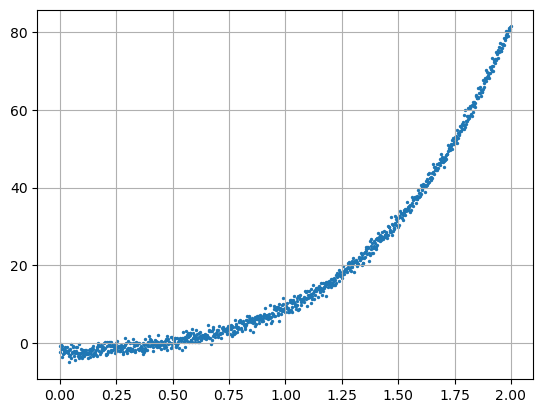

In [9]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

plt.figure()
plt.scatter(x,y, s=2)
plt.grid()

In [23]:
def f_costo(beta, X, y):
    m,n=X.shape
    beta=np.reshape(beta, [n,1])
    prediccion= X @ beta 
    error= prediccion-y
    return (error.T @ error)[0][0]


In [24]:
m=len(y)
ones=np.ones([m,1])
x1=np.reshape(x,[m,1])

X1=np.hstack((ones,x1))
X1

array([[1.      , 0.      ],
       [1.      , 0.002002],
       [1.      , 0.004004],
       ...,
       [1.      , 1.995996],
       [1.      , 1.997998],
       [1.      , 2.      ]])

In [25]:
beta_inicial1=np.random.rand(2) 
y_vec1=np.reshape(y,[m,1])

In [26]:
sol1=opt.minimize(f_costo, beta_inicial1, args=(X1,y_vec1))
sol1

      fun: 88104.13153847141
 hess_inv: array([[ 0.00200624, -0.00151384],
       [-0.00151384,  0.00151999]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 6
     njev: 12
   status: 0
  success: True
        x: array([-17.61408996,  36.46039598])

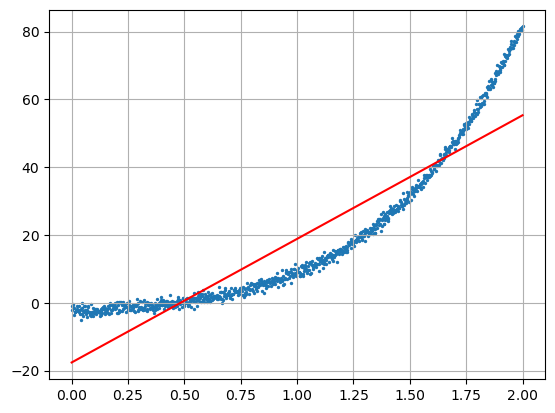

In [27]:
plt.figure()
plt.scatter(x,y, s=2)
plt.plot(x1,X1@sol1.x, "r")

plt.grid()

In [28]:
m=len(y)
ones=np.ones([m,1])
x1=np.reshape(x,[m,1])
x2=np.reshape(x**2,[m,1])
x3=np.reshape(x**3,[m,1])


X3=np.hstack((ones,x1,x2,x3))
X3

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.00200200e-03, 4.00801202e-06, 8.02404808e-09],
       [1.00000000e+00, 4.00400400e-03, 1.60320481e-05, 6.41923846e-08],
       ...,
       [1.00000000e+00, 1.99599600e+00, 3.98400002e+00, 7.95204808e+00],
       [1.00000000e+00, 1.99799800e+00, 3.99199600e+00, 7.97600002e+00],
       [1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00]])

In [29]:
beta_inicial3=np.random.rand(4) 
y_vec3=np.reshape(y,[m,1])

In [30]:
sol3=opt.minimize(f_costo, beta_inicial3, args=(X3,y_vec3))
sol3

      fun: 1035.5573137432489
 hess_inv: array([[ 0.00260281, -0.00396387, -0.00062267,  0.00115455],
       [-0.00396387,  0.01242315, -0.00229248, -0.00210792],
       [-0.00062267, -0.00229248,  0.00186607, -0.00014114],
       [ 0.00115455, -0.00210792, -0.00014114,  0.00060746]])
      jac: array([ 0.00000000e+00, -1.52587891e-05,  0.00000000e+00,  0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 135
      nit: 12
     njev: 27
   status: 2
  success: False
        x: array([ -3.19286816,  10.60271363, -13.22768245,  14.52655807])

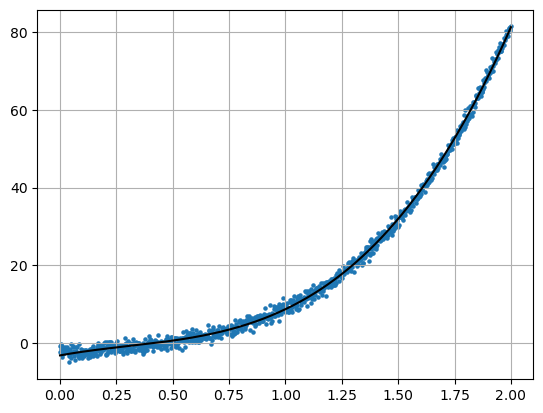

In [31]:
plt.figure()
plt.scatter(x,y,s=5)
plt.plot(x1,X3@sol3.x, color="black")
plt.grid()

In [32]:
m=len(y)
ones=np.ones([m,1])
x1=np.reshape(x,[m,1])
x2=np.reshape(x**2,[m,1])
x3=np.reshape(x**3,[m,1])
x4=np.reshape(x**4,[m,1])
x5=np.reshape(x**5,[m,1])

X5=np.hstack((ones,x1,x2,x3,x4,x5))
X5

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.00200200e-03, 4.00801202e-06, 8.02404808e-09,
        1.60641603e-11, 3.21604811e-14],
       [1.00000000e+00, 4.00400400e-03, 1.60320481e-05, 6.41923846e-08,
        2.57026565e-10, 1.02913540e-12],
       ...,
       [1.00000000e+00, 1.99599600e+00, 3.98400002e+00, 7.95204808e+00,
        1.58722561e+01, 3.16809597e+01],
       [1.00000000e+00, 1.99799800e+00, 3.99199600e+00, 7.97600002e+00,
        1.59360321e+01, 3.18401602e+01],
       [1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01, 3.20000000e+01]])

In [33]:
beta_inicial5=np.random.rand(6) 
y_vec5=np.reshape(y,[m,1])

In [34]:
sol5=opt.minimize(f_costo, beta_inicial5, args=(X5,y_vec5))
sol5

      fun: 964.2161619744702
 hess_inv: array([[ 0.00588822, -0.01487826,  0.01059606, -0.00372196,  0.00250248,
        -0.00093478],
       [-0.01487826,  0.03985621, -0.0258025 ,  0.00922754, -0.01071671,
         0.00444294],
       [ 0.01059606, -0.0258025 ,  0.02289938, -0.00588538, -0.0005762 ,
         0.0001093 ],
       [-0.00372196,  0.00922754, -0.00588538,  0.00265834, -0.00219111,
         0.00071871],
       [ 0.00250248, -0.01071671, -0.0005762 , -0.00219111,  0.01286024,
        -0.00540397],
       [-0.00093478,  0.00444294,  0.0001093 ,  0.00071871, -0.00540397,
         0.00235866]])
      jac: array([9.91821289e-05, 1.14440918e-04, 1.67846680e-04, 2.28881836e-04,
       3.66210938e-04, 6.86645508e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 217
      nit: 17
     njev: 31
   status: 2
  success: False
        x: array([-2.37600805,  2.27654114,  5.97973862, -1.11998991,  4.43841612,
       -0.18960271])

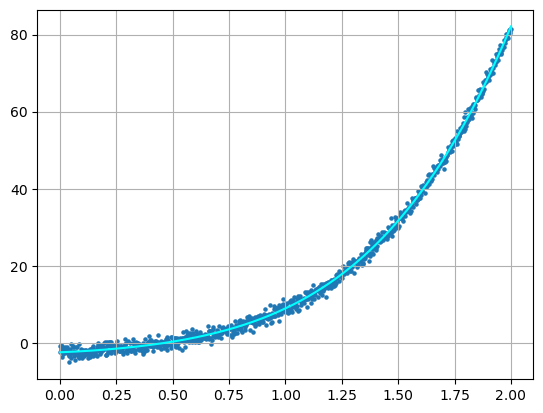

In [35]:
plt.figure()
plt.scatter(x,y,s=5)
plt.plot(x1,X5@sol5.x, color="cyan")
plt.grid()

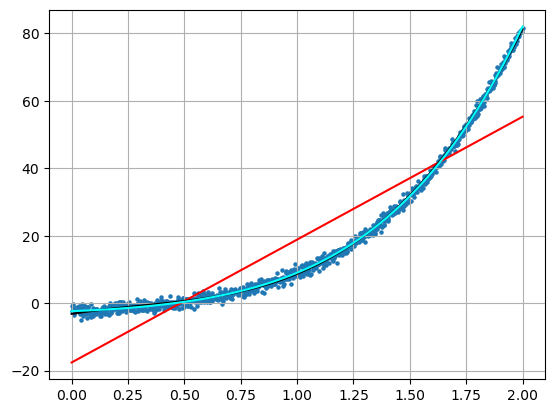

In [36]:
plt.figure()
plt.scatter(x,y,s=5)
plt.plot(x1,X1@sol1.x, "r")
plt.plot(x1,X3@sol3.x, color="black")
plt.plot(x1,X5@sol5.x, color="cyan")
plt.grid()

<BarContainer object of 3 artists>

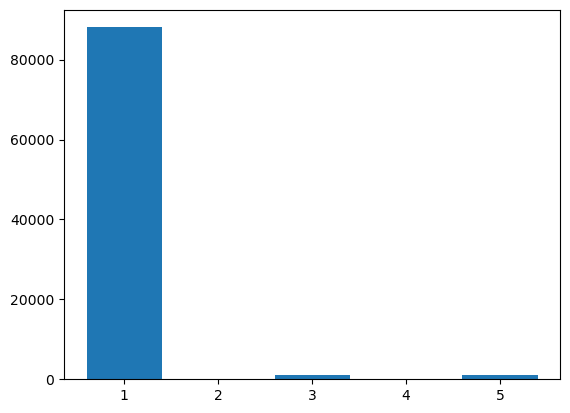

In [37]:
plt.figure()
plt.bar([1,3,5],[sol1.fun,sol3.fun,sol5.fun])

<BarContainer object of 2 artists>

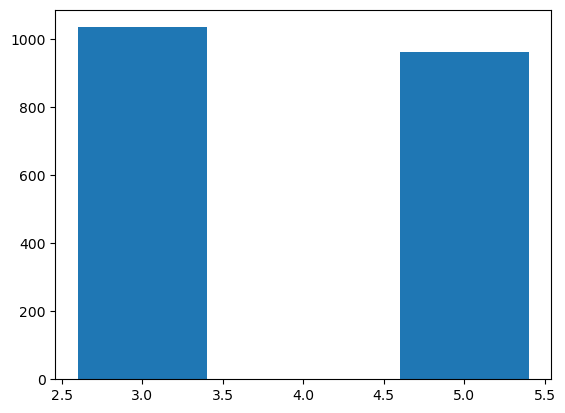

In [38]:
plt.figure()
plt.bar([3,5],[sol3.fun,sol5.fun])

### Resultado
En base a las gráficas de barras de los errores, el que muestra menor error es el Polinomio de Grado 5, siendo un poco más exacto que el de grado 3.

2. Muestre en un gráfico los datos y el polinomio que mejor se ajuste.

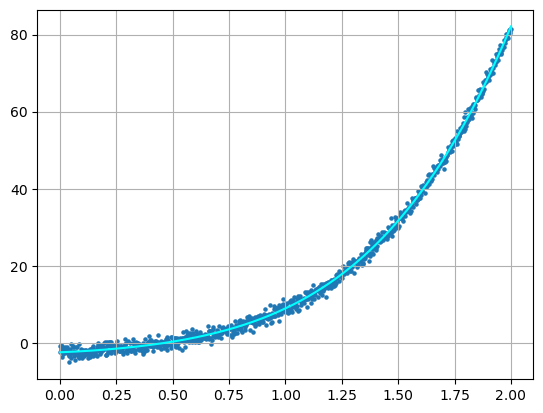

In [39]:
plt.figure()
plt.scatter(x,y,s=5)
plt.plot(x1,X5@sol5.x, color="cyan")
plt.grid()

3. Use el modelo para averiguar el valor de $y$ cuando:
- $x=0.001$
- $x=-0.1$
- $x=2.1$

In [40]:
def poli(x):
    return -2.37600153 + 2.27644999*x + 5.98004908*x**2 - 1.12039898*x**3 + 4.43864485*x**4 - 0.1896483*x**5
poli(0.001)

-2.37371910107688

In [41]:
poli(-0.1)

-2.542279878252

In [42]:
poli(2.1)

96.97832572852202

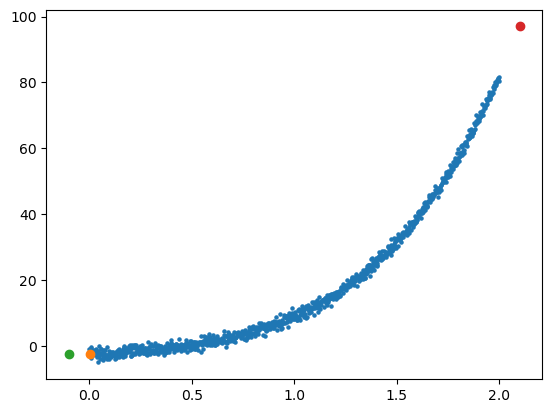

In [43]:
plt.figure()
plt.scatter(x,y,s=5)
plt.scatter(0.001,poli(0.001))
plt.scatter(-0.1,poli(-0.1))
plt.scatter(2.1,poli(2.1))

4. ¿Qué diferencias encuentra en cuanto a la interpolación y la extrapolación?

La interpolación es más exacta que la extrapolación ya que hay datos en los extremos para aporximar, normalmente la extrapolación conforme se aleja de los datos que tiene ya sea hacía la derecha o la izquierda, se pierde la precisión del módelo.

5. (Punto extra) Agregue un termino $\beta_5 cos(10x)$ a su modelo y grafique los resultados. ¿Mejoró el resultado?

# Corrección por falta de Tiempo

In [44]:
m=len(y)
ones=np.ones([m,1])
x1=np.reshape(x,[m,1])
x2=np.reshape(x**2,[m,1])
x3=np.reshape(x**3,[m,1])
x4=np.reshape(x**4,[m,1])
x51=np.reshape(np.cos(10*x),[m,1])

X51=np.hstack((ones,x1,x2,x3,x4,x51))
X51

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.00200200e-03, 4.00801202e-06, 8.02404808e-09,
        1.60641603e-11, 9.99799606e-01],
       [1.00000000e+00, 4.00400400e-03, 1.60320481e-05, 6.41923846e-08,
        2.57026565e-10, 9.99198505e-01],
       ...,
       [1.00000000e+00, 1.99599600e+00, 3.98400002e+00, 7.95204808e+00,
        1.58722561e+01, 4.44299584e-01],
       [1.00000000e+00, 1.99799800e+00, 3.99199600e+00, 7.97600002e+00,
        1.59360321e+01, 4.26276246e-01],
       [1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01, 4.08082062e-01]])

In [45]:
beta_inicial51=np.random.rand(6) 
y_vec51=np.reshape(y,[m,1])

In [46]:
sol51=opt.minimize(f_costo, beta_inicial51, args=(X51,y_vec51))
sol51

      fun: 962.838313542673
 hess_inv: array([[ 0.00437832, -0.00582576, -0.01090973,  0.01680736, -0.0053522 ,
         0.00018498],
       [-0.00582576,  0.01497136,  0.01610146, -0.03607512,  0.0129943 ,
        -0.0011486 ],
       [-0.01090973,  0.01610146,  0.03642935, -0.05258221,  0.01604396,
         0.00116607],
       [ 0.01680736, -0.03607512, -0.05258221,  0.09854154, -0.03365471,
         0.00014126],
       [-0.0053522 ,  0.0129943 ,  0.01604396, -0.03365471,  0.01196312,
        -0.00028812],
       [ 0.00018498, -0.0011486 ,  0.00116607,  0.00014126, -0.00028812,
         0.00105083]])
      jac: array([0.00000000e+00, 3.05175781e-05, 1.52587891e-05, 1.52587891e-05,
       1.52587891e-05, 1.52587891e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 418
      nit: 15
     njev: 58
   status: 2
  success: False
        x: array([-2.34703106,  2.16790197,  5.73942866, -0.23676901,  3.69625973,
       -0.05932227])

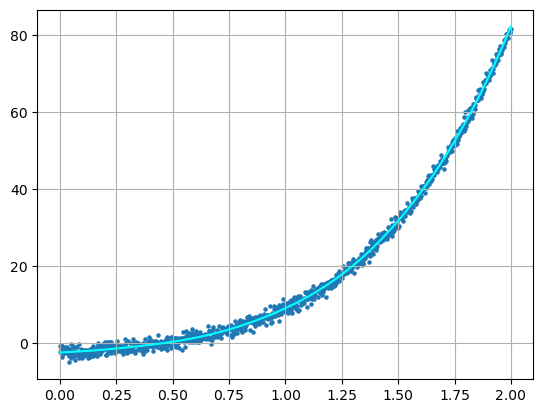

In [47]:
plt.figure()
plt.scatter(x,y,s=5)
plt.plot(x1,X51@sol51.x, color="cyan")
plt.grid()

<BarContainer object of 3 artists>

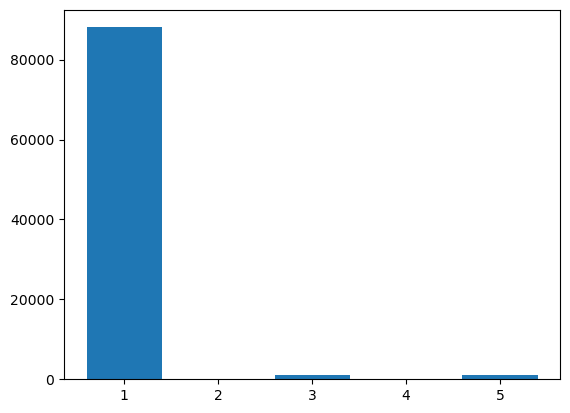

In [48]:
plt.figure()
plt.bar([1,3,5],[sol1.fun,sol3.fun,sol51.fun])

<BarContainer object of 2 artists>

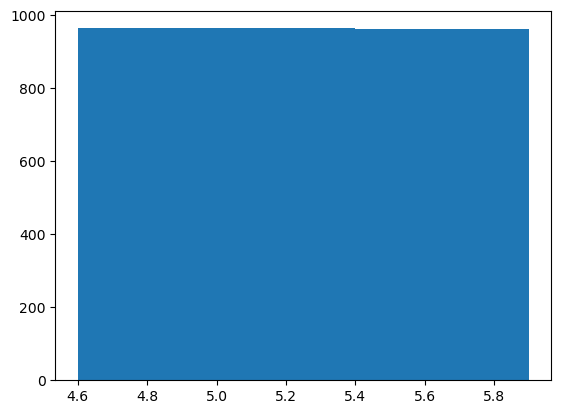

In [52]:
plt.figure()
plt.bar([5,5.5],[sol5.fun,sol51.fun])

Se puede apreciar al comparar el gráfico de error de el término $\beta_5x^5$ contra el término $\beta_5 cos(10x)$ que sí hay una pequeña mejora, tal vez no muy significativa.